# Stage 12 - Final Reporting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

df = pd.read_csv('../data/processed/VIX_S&P500_features.csv')
df.head()

,date,vix_close,vix_high,vix_low,vix_open,sp500_close,sp500_high,sp500_low,sp500_open,sp500_volume,log_sp500_close,vix_delta,vix_spread,sp500_delta,sp500_spread
0,2019-08-28,19.350000,21.639999,19.10,20.549999,2887.939941,2890.030029,2853.050049,2861.280029,3102480000,7.968299,-1.199999,2.539999,26.659912,36.979980
1,2019-08-29,17.879999,19.200001,17.60,19.020000,2924.580078,2930.500000,2905.669922,2910.370117,3177150000,7.980906,-1.140001,1.600000,14.209961,24.830078
2,2019-08-30,18.980000,19.180000,17.09,17.940001,2926.459961,2940.429932,2913.320068,2937.090088,3009910000,7.981549,1.039999,2.090000,-10.630127,27.109863
3,2019-09-03,19.660000,21.150000,19.41,20.959999,2906.270020,2914.389893,2891.850098,2909.010010,3427830000,7.974626,-1.299999,1.740000,-2.739990,22.539795
4,2019-09-04,17.330000,18.830000,17.26,18.230000,2937.780029,2938.840088,2921.860107,2924.669922,3167900000,7.985409,-0.900000,1.570000,13.110107,16.979980


In [14]:
# Export directory

img_dir = Path('../deliverables')
img_dir.mkdir(parents = True, exist_ok = True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi = 300)
    print(f'Saved {name}')

Saved VIX Delta v.s. S&P 500 Delta.png


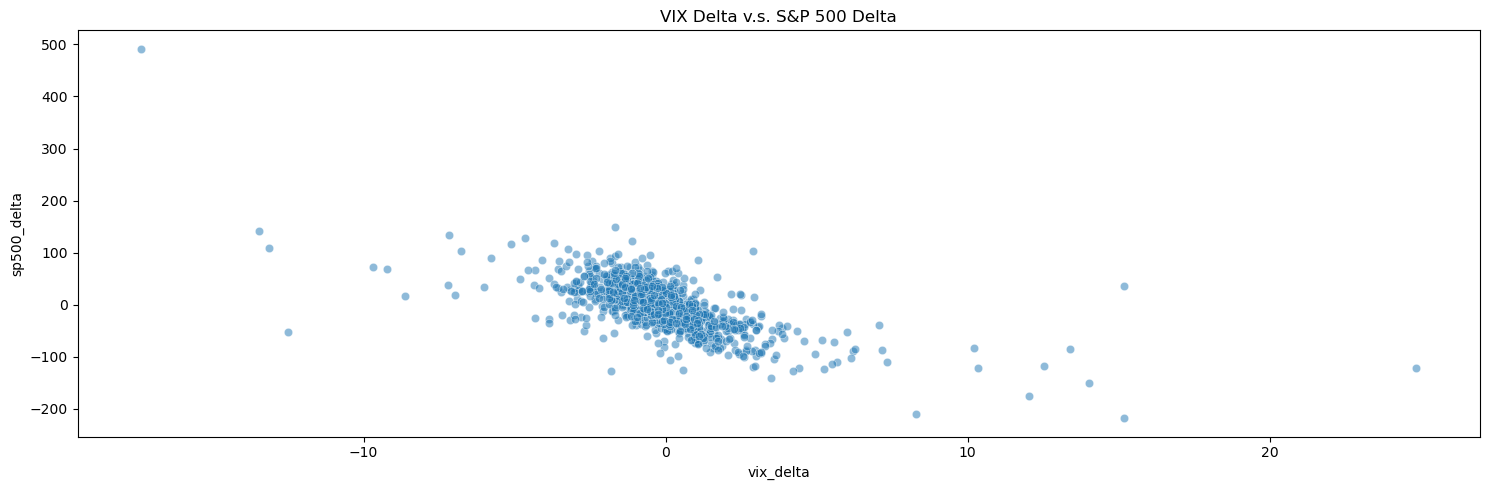

In [15]:
# Scatterplot of VIX delta v.s. S&P 500 delta

plt.figure(figsize = (15,5))
sns.scatterplot(data = df, x = 'vix_delta', y = 'sp500_delta', alpha = 0.5)
plt.title('VIX Delta v.s. S&P 500 Delta')
savefig('VIX Delta v.s. S&P 500 Delta.png')
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

X = df[['vix_delta']]
y = df['sp500_delta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'Baseline R² = {r2:.4f}, RMSE = {rmse:.6f}')

Baseline R² = 0.4051, RMSE = 29.306070


Saved Residuals v.s. Fitted.png


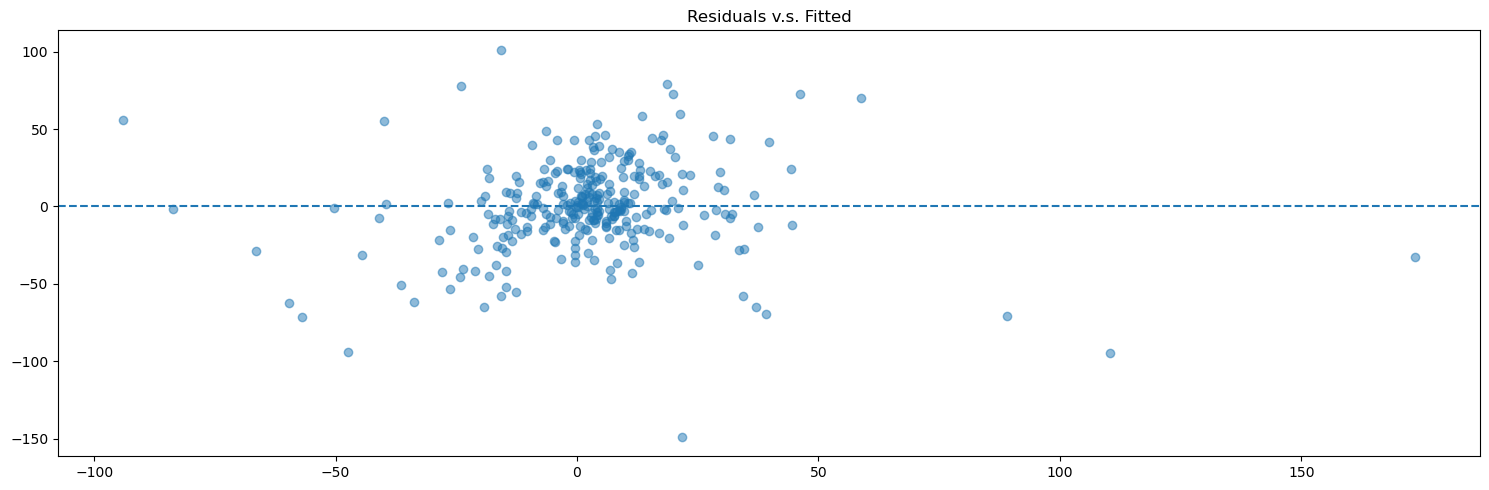

In [41]:
# Residual v.s. fitted graph of deltas

resid = y_test - y_pred
fitted = y_pred
plt.figure(figsize = (15,5))
plt.scatter(fitted, resid, alpha = 0.5)
plt.axhline(0, ls = '--')
plt.title('Residuals v.s. Fitted')
savefig('Residuals v.s. Fitted.png')
plt.show()

In [42]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, TimeSeriesSplit

df = pd.read_csv('../data/processed/VIX_S&P500_features.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,vix_close,vix_high,vix_low,vix_open,sp500_close,sp500_high,sp500_low,sp500_open,sp500_volume,log_sp500_close,vix_delta,vix_spread,sp500_delta,sp500_spread
date,,,,,,,,,,,,,,
2019-08-28,19.350000,21.639999,19.10,20.549999,2887.939941,2890.030029,2853.050049,2861.280029,3102480000,7.968299,-1.199999,2.539999,26.659912,36.979980
2019-08-29,17.879999,19.200001,17.60,19.020000,2924.580078,2930.500000,2905.669922,2910.370117,3177150000,7.980906,-1.140001,1.600000,14.209961,24.830078
2019-08-30,18.980000,19.180000,17.09,17.940001,2926.459961,2940.429932,2913.320068,2937.090088,3009910000,7.981549,1.039999,2.090000,-10.630127,27.109863
2019-09-03,19.660000,21.150000,19.41,20.959999,2906.270020,2914.389893,2891.850098,2909.010010,3427830000,7.974626,-1.299999,1.740000,-2.739990,22.539795
2019-09-04,17.330000,18.830000,17.26,18.230000,2937.780029,2938.840088,2921.860107,2924.669922,3167900000,7.985409,-0.900000,1.570000,13.110107,16.979980


In [43]:
df['lag_vix_1'] = df['vix_close'].shift(1)
df['lag_vix_5'] = df['vix_close'].shift(5)
df['roll_mean_vix_5'] = df['vix_close'].rolling(5).mean().shift(1)
df['roll_vol_vix_20'] = df['vix_close'].rolling(20).std().shift(1)

df['lag_sp500_1'] = df['log_sp500_close'].shift(1)
df['lag_sp500_5'] = df['log_sp500_close'].shift(5)
df['roll_mean_sp500_5'] = df['log_sp500_close'].rolling(5).mean().shift(1)
df['roll_vol_sp500_20'] = df['log_sp500_close'].rolling(20).std().shift(1)

df['next_sp500_close'] = df['log_sp500_close'].shift(-1)
df_feat = df.dropna().copy()

In [44]:
# Time-aware split

cut = int(len(df_feat) * 0.8)
train, test = df_feat.iloc[:cut], df_feat.iloc[cut:]

features = [
    'lag_vix_1','lag_vix_5','roll_mean_vix_5','roll_vol_vix_20',
    'lag_sp500_1','lag_sp500_5','roll_mean_sp500_5','roll_vol_sp500_20'
]
X_tr, X_te = train[features], test[features]
y_tr, y_te = train['next_sp500_close'], test['next_sp500_close']

In [45]:
reg = Pipeline([('scaler', StandardScaler()),('linreg', LinearRegression())])
reg.fit(X_tr, y_tr)
pred = reg.predict(X_te)

In [46]:
# Metrics 

mse = mean_squared_error(y_te, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_te, pred)
print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}')

RMSE: 0.0171, MAE: 0.0115


In [47]:
# Residuals ananlysis

residuals = y_te - pred

Saved Residuals over Time.png


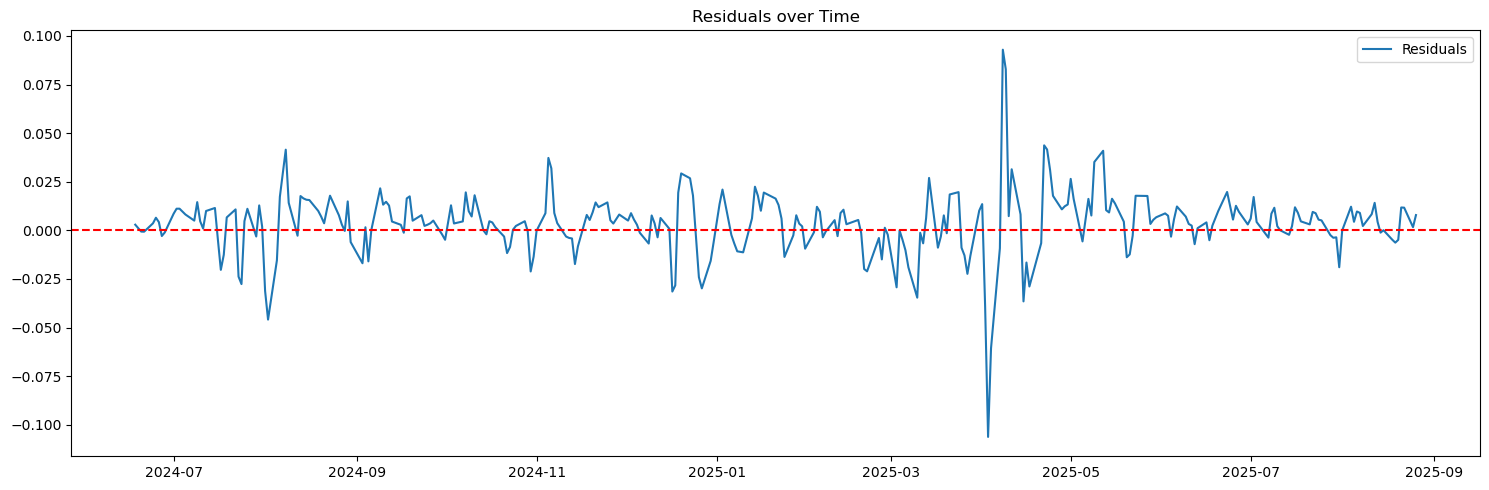

In [48]:
# Residuals over time

plt.figure(figsize = (15,5))
plt.plot(y_te.index, residuals, label = 'Residuals')
plt.axhline(0, color = 'r', linestyle = '--')
plt.legend()
plt.title('Residuals over Time')
savefig('Residuals over Time.png')
plt.show()

Saved Prediction Error Plot.png


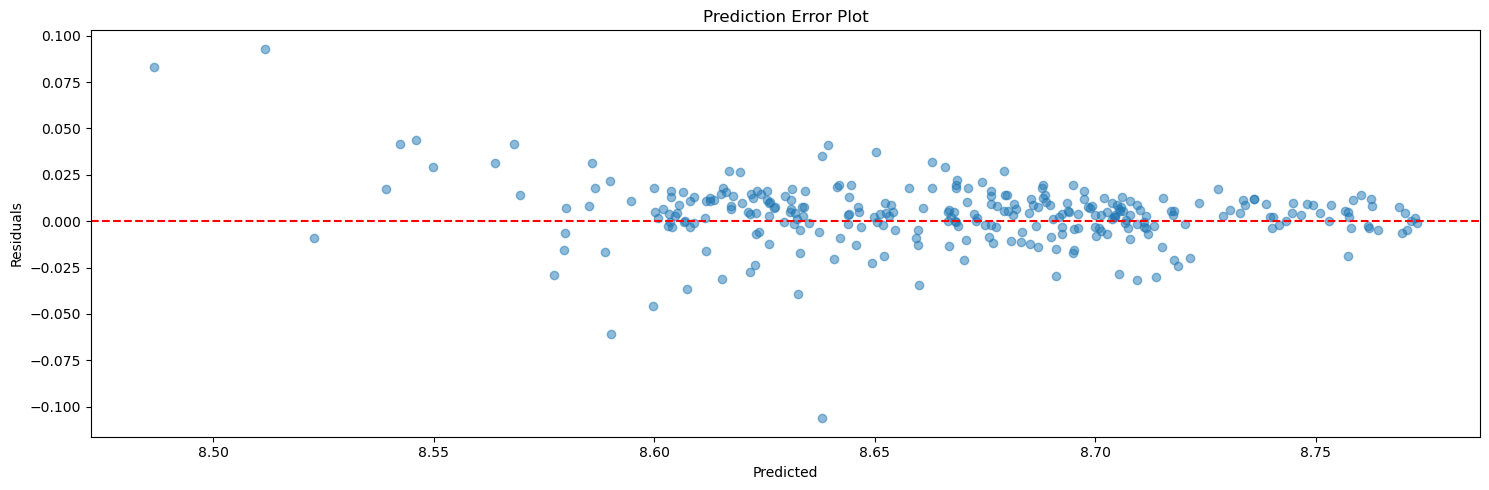

In [49]:
# Prediction error plot

plt.figure(figsize = (15,5))
plt.scatter(pred, residuals, alpha = 0.5)
plt.axhline(0, color = 'r', linestyle = '--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Prediction Error Plot')
savefig('Prediction Error Plot.png')
plt.show()

Saved Next-Day S&P 500 Forecast.png


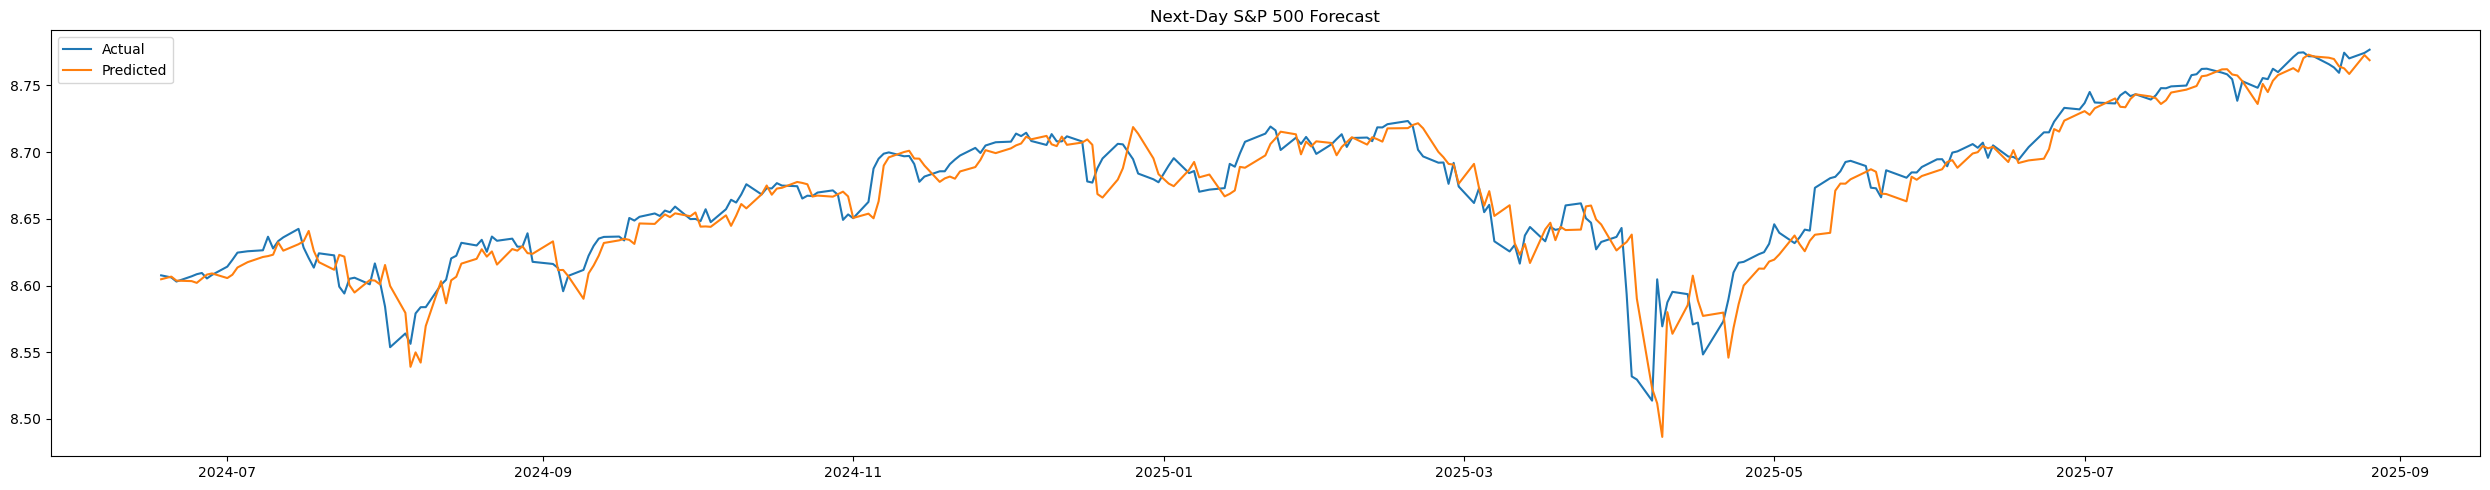

In [50]:
# Forecast visualization

plt.figure(figsize = (25,5))
plt.plot(y_te.index, y_te, label = 'Actual')
plt.plot(y_te.index, pred, label = 'Predicted')
plt.legend()
plt.title('Next-Day S&P 500 Forecast')
savefig('Next-Day S&P 500 Forecast.png')
plt.show()

In [52]:
import sys
import os

sys.path.append(os.path.abspath('../src'))
from risk_eval import * 

In [54]:
# Baseline fit & residuals

X_raw = df['vix_close'].values
y = df['log_sp500_close'].values
X_base = mean_impute(X_raw)
model = fit_fn(X_base.reshape(-1,1), y)
y_hat = model.predict(X_base.reshape(-1,1))
df['x_imputed'] = X_base
base_mae = mae(y, y_hat)
print(base_mae)

0.14432739829252011


In [55]:
# Scenario sensitivity


scenarios = {
    'mean_impute': mean_impute,
    'median_impute': median_impute,
    'drop_missing': lambda a: a[~np.isnan(a)] if np.isnan(a).any() else a
}

results = []
for name, fn in scenarios.items():
    if name == 'drop_missing' and np.isnan(X_raw).any():
        mask = ~np.isnan(X_raw)
        Xs, ys = X_raw[mask], y[mask]
        m = fit_fn(Xs.reshape(-1,1), ys)
        yh = m.predict(Xs.reshape(-1,1))
    else:
        Xs = fn(X_raw)
        m = fit_fn(Xs.reshape(-1,1), y)
        yh = m.predict(Xs.reshape(-1,1))
    results.append({'scenario': name, 'mae': mae(y[:len(yh)], yh), 'slope': m.coef_[0], 'intercept': m.intercept_})
sens = pd.DataFrame(results); sens

,scenario,mae,slope,intercept
0,mean_impute,0.144327,-0.012936,8.629538
1,median_impute,0.144327,-0.012936,8.629538
2,drop_missing,0.144327,-0.012936,8.629538
